In [150]:
import sklearn.linear_model

In [151]:
import pandas

In [152]:
df = pandas.DataFrame(
   {'jam_rating':[2,4,7,8,9],
    'jam_price':[1,2,3,4,5]}

)
df

,jam_price,jam_rating
0,1,2
1,2,4
2,3,7
3,4,8
4,5,9


In [153]:
%matplotlib inline

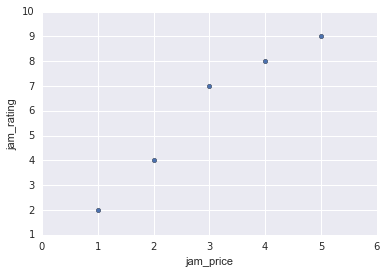

In [154]:
df.plot.scatter('jam_price','jam_rating')

In [155]:
import seaborn

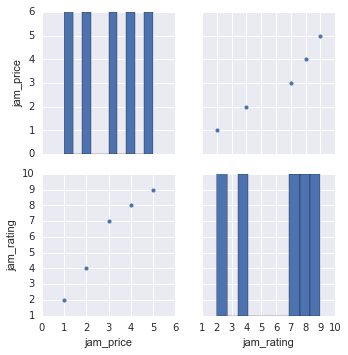

In [156]:
seaborn.pairplot(data=df)

In [157]:
ransac = sklearn.linear_model.RANSACRegressor()

In [158]:
ransac.fit(df[['jam_price']], df.jam_rating)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [159]:
ransac.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
ransac.estimator_.coef_

array([ 1.8])

In [161]:
ransac.estimator_.intercept_

0.60000000000000053

In [162]:
ransac.predict([2.5])

/Users/tianjiaoxie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 5.1])

In [163]:
ransac.predict([[2.5],[3.5],[4.5]])

array([ 5.1,  6.9,  8.7])

In [164]:
predictions = ransac.predict(df[['jam_price']])
predictions

array([ 2.4,  4.2,  6. ,  7.8,  9.6])

In [165]:
import matplotlib.pyplot

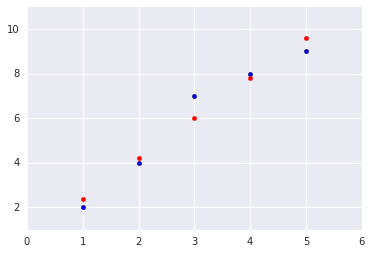

In [166]:
matplotlib.pyplot.scatter(df.jam_price,df.jam_rating)
matplotlib.pyplot.scatter(df.jam_price,predictions,color='red')

[(1, 2.034727287982228),
 (2, 4.0204735951594195),
 (3, 6.0062199023366114),
 (4, 7.9919662095138033),
 (5, 9.9777125166909943)]

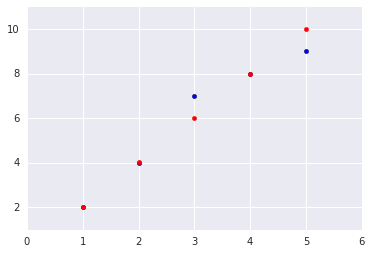

In [167]:
theilsen = sklearn.linear_model.TheilSenRegressor()
theilsen.fit(df[['jam_price']],df.jam_rating)
theilsen_predictions = theilsen.predict(df[['jam_price']])
matplotlib.pyplot.scatter(df.jam_price,df.jam_rating)
matplotlib.pyplot.scatter(df.jam_price,theilsen_predictions,color='red')
zip(df.jam_price,theilsen_predictions)

In [168]:
theilsen.coef_

array([ 1.98574631])

In [169]:
theilsen.intercept_

0.048980980805036024

[(1, 2.034727287982228),
 (2, 4.0204735951594195),
 (3, 6.0062199023366114),
 (4, 7.9919662095138033),
 (5, 9.9777125166909943)]

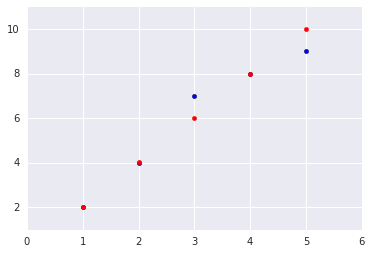

In [170]:
l = sklearn.linear_model.TheilSenRegressor()
l.fit(df[['jam_price']],df.jam_rating)
l_predictions = theilsen.predict(df[['jam_price']])
matplotlib.pyplot.scatter(df.jam_price,df.jam_rating)
matplotlib.pyplot.scatter(df.jam_price,l_predictions,color='red')
zip(df.jam_price,l_predictions)

In [171]:
l.coef_

array([ 1.98574631])

In [172]:
l.intercept_

0.048980980805036024

# Multi-dimensional linear regression

In [173]:
sac = pandas.read_csv('3.2-lab/assets/datasets/Sacramentorealestatetransactions.csv',index_col=0)
sac

,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
street,,,,,,,,,,,
3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555


In [174]:
sac.columns

Index([u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft', u'type',
       u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

In [175]:
x = sac[['beds','baths','sq__ft','latitude','longitude']]

In [176]:
y = sac.price

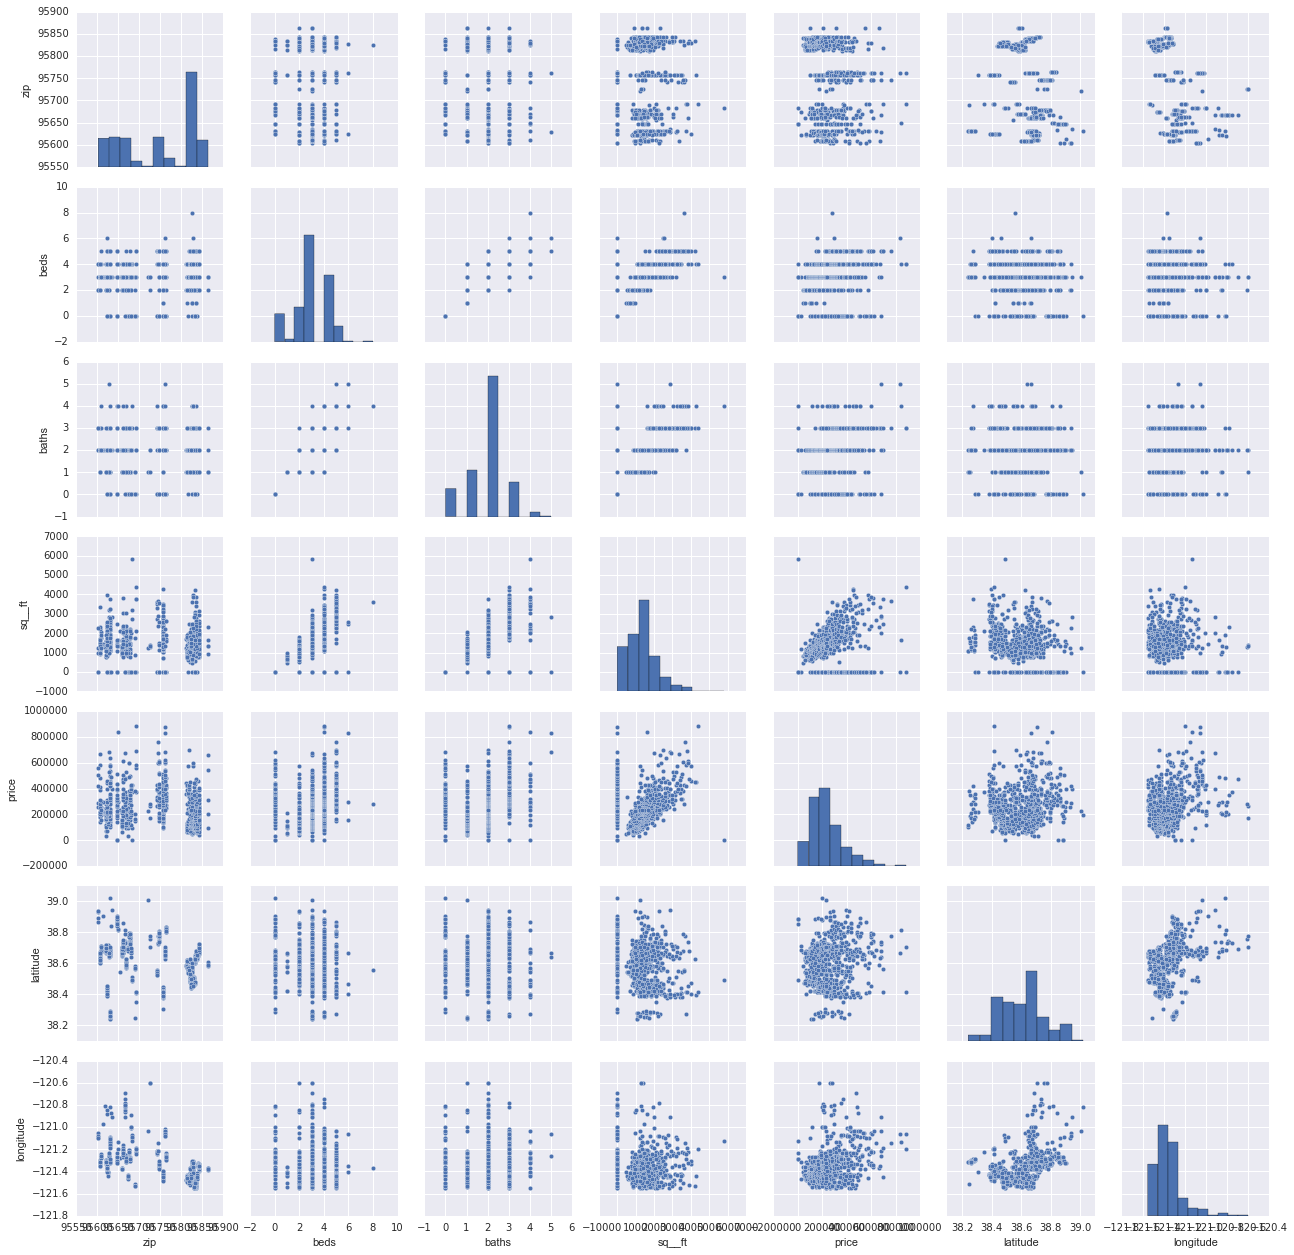

In [177]:
seaborn.pairplot(sac)

In [178]:
ols = sklearn.linear_model.LinearRegression()
ols.fit(x,y)
zip(['beds','baths','sq__ft','latitude','longitude'],ols.coef_)

[('beds', -5177.0604470771859),
 ('baths', 47018.31751263779),
 ('sq__ft', 34.440179386991076),
 ('latitude', -25449.698100080914),
 ('longitude', 325120.7717371895)]

In [179]:
ols.score(x,y)

0.27428458034206371

In [180]:
t2 = sklearn.linear_model.TheilSenRegressor()
t2.fit(x,y)
zip(['beds','baths','sq__ft','latitude','longitude'],t2.coef_)

[('beds', 111104.49919792578),
 ('baths', 262990.94513218448),
 ('sq__ft', 84.749431434103855),
 ('latitude', -6688.789963697629),
 ('longitude', 197568.16117380431)]

In [181]:
t2.score(x,y)

-7.2962822080195302

In [182]:
r2 = sklearn.linear_model.RANSACRegressor()
r2.fit(x,y)
zip(['beds','baths','sq__ft','latitude','longitude'],r2.estimator_.coef_)

[('beds', -949.89670712818679),
 ('baths', 16879.241795854905),
 ('sq__ft', 109.24852531048964),
 ('latitude', 29678.723609713896),
 ('longitude', 114460.6556239401)]

In [183]:
lasso = sklearn.linear_model.Lasso(alpha=10000)
lasso.fit(x,y)
zip(['beds','baths','sq__ft','latitude','longitude'],lasso.coef_)

[('beds', 0.0),
 ('baths', 31413.877120481931),
 ('sq__ft', 32.195447112137231),
 ('latitude', 0.0),
 ('longitude', 0.0)]

In [184]:
lasso.score(x,y)

0.16732308502626614

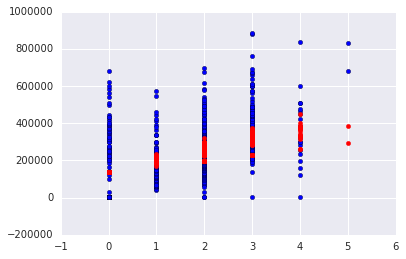

In [185]:
lasso_prediction = lasso.predict(x)
matplotlib.pyplot.scatter(sac.baths,sac.price)
matplotlib.pyplot.scatter(sac.baths,lasso_prediction,color='red')

In [186]:
type(lasso_prediction)

numpy.ndarray

# how could we improve?
lets do some non-linear stuff

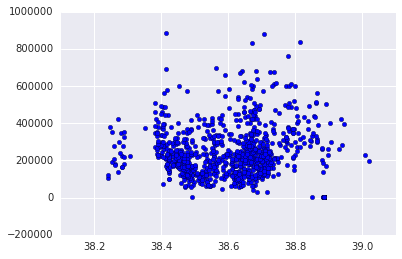

In [187]:
matplotlib.pyplot.scatter(sac.latitude, sac.price)

In [188]:
(sac.latitude < 38.35).value_counts()

False    962
True      23
Name: latitude, dtype: int64

In [189]:
(sac.latitude < 38.3).value_counts()

False    963
True      22
Name: latitude, dtype: int64

In [190]:
import numpy
sac['river_south'] = numpy.where(sac.latitude < 38.35,1,0)

In [191]:
x = sac[['beds','baths','sq__ft','latitude','longitude','river_south']]

In [192]:
ols.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [193]:
zip(['beds','baths','sq__ft','latitude','longitude','river_south'],ols.coef_)

[('beds', -5210.2467788956574),
 ('baths', 46814.697557668442),
 ('sq__ft', 34.031674132944318),
 ('latitude', -40180.517431029119),
 ('longitude', 332190.09876962402),
 ('river_south', -29114.578355446534)]

In [194]:
ols.score(x,y)

0.27511225117176896

In [195]:
sac.price.median()

213750.0

In [196]:
sac.price.mean()

234144.26395939087

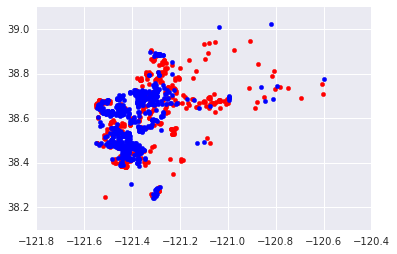

In [200]:
expensive_houses = sac[sac.price>250000]
cheap_houses = sac[sac.price <=250000]
matplotlib.pyplot.scatter(expensive_houses.longitude,expensive_houses.latitude, color='red')
matplotlib.pyplot.scatter(cheap_houses.longitude,cheap_houses.latitude, color='blue')

lets add another variable for 'north eastern'-ness

In [201]:
northeastern = (sac.latitude>38.6)&(sac.longitude>-121.4)

In [202]:
sac

,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,river_south
street,,,,,,,,,,,,
3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0
5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,0
6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0
2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0
11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,0


In [ ]:
sac.zip.map(lambda x: int(x/10))